Одним из относительно новых направлений в машинном обучении является формирование признаков на основе топологического анализа данных. Рассмотрим, как он может применяться в обработке текстов на примере оценки приемлемости.

## Топологический анализ данных

Топология является разновидностью геометрии и посвящена изучению качественных свойств геометрических фигур, не зависящих от расстояний, величин углов, площадей и объёмов. В отличие от геометрии, эквивалентными в топологии считаются те фигуры, которые получаются друг из друга произвольной обратимой непрерывной деформацией.

Например, заостряя края шара, можно деформировать его в куб или любой другой выпуклый многоугольник. Поэтому с точки зрения топологии эти фигуры эквивалентны.

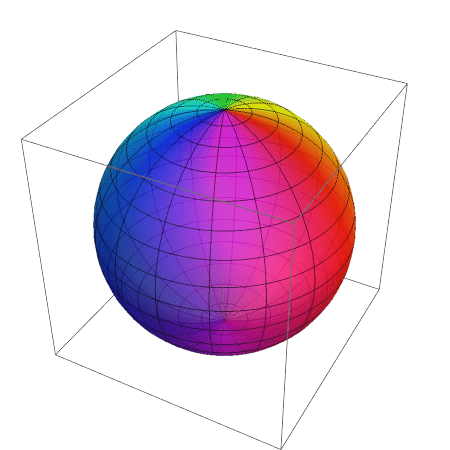

Кроме того, кружка с ручкой и бублик эквивалентны. Напротив, бублик и шар не эквивалентны.

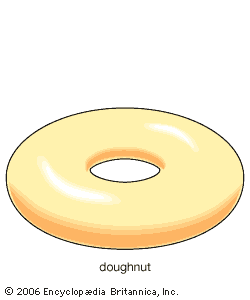

Топологический анализ данных (Topological Data Analysis, TDA) — это раздел прикладной математики, который использует идеи топологии для изучения "формы" данных. В основе лежит идея, что топологические особенности наборов данных, как отверстия, пустоты и связанные компоненты, содержат полезную информацию, которую можно использовать для выявления структуры сложных многомерных данных.

Объекты набора данных можно представить как облако точек в многомерном пространстве. Вокруг каждой точки можно нарисовать шар радиуса $ε$. Если какие-то группы точек расположены так, что попарное расстояние меньше, чем $2ε$, то соединяем их ребрами:
- две точки лежат ближе, чем $2ε$, — отрезок
- три точки лежат ближе, чем $2ε$, — треугольник
- четыре точки лежат ближе, чем $2ε$, — тертаэдр

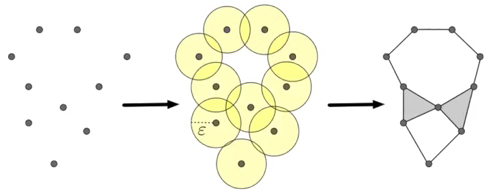

Получившиеся фигуры являются симплексами — $n$-мерным обобщением треугольника.
- отрезок — одномерный симплекс
- треугольник — двумерный симплекс
- тетраэдр — трехмерный симплекс

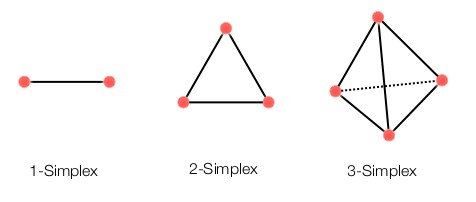

Образуется совокупность симплексов, которая приближает исследуемое многообразие данных. Формально такая структура называется симплициальный компле́кс.

Одномерный симплициальный комплекс эквивалентен графу. Граф — это множество точек (вершин, узлов), которые соединяются множеством линий (рёбер, дуг).

📌 Сколько ребер и сколько вершин в данном графе?

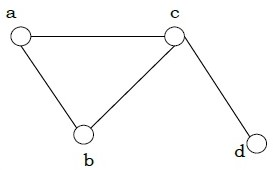

Для характеристики данных могут учитываться различные характеристики графа.

### Компонента связности графа

Граф называется *связным*, если любые две его несовпадающие вершины соединены цепью. Всякий максимально связный подграф графа G называется *компонентой связности* графа G.

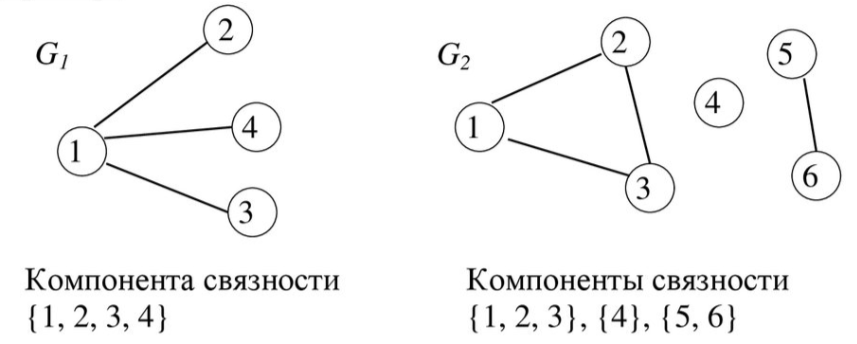

📌 Определите число компонент связности для графов $G_1$ и $G_2$

### Простой цикл в графе

*Путем* от  $x_i$ до $x_j$  называется такая последовательность ребер графа, ведущая от $x_i$ к $x_j$ , в которой два соседних ребра имеют общую вершину и никакое ребро не встречается дважды. *Длиной* пути называется число ребер этого пути.

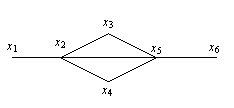

$x_1, x_2, x_5, x_6$ — путь от $x_1$ до $x_6$ длиной 3

📌 Какие еще есть пути от $x_1$ до $x_6$ в данном графе?

*Циклом* называется путь, в котором начальная и конечная вершины совпадают. *Длиной* цикла называется число ребер в этом цикле. Цикл называется *простым*, если он не проходит через одну вершину более одного раза.

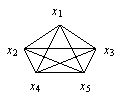

В данном графе есть следующие циклы:

$x_1, x_5, x_4, x_1$ — простой цикл длиной 3

📌 Какие еще простые циклы есть в данном графе?

Цикл $x_1, x_2, x_4, x_5, x_2, x_3, x_1$ длиной 6 не является простым.

📌 Почему?

## Топологический анализ данных для оценки приемлемости

Один из способов автоматической классификации по приемлемости — дообучение (тонкая настройка) предобученных энкодерных моделей (BERT, RoBERTa и т.д.). Предобученные модели предоставляют векторы предложений, которые учитывают связи между словами благодаря механизму внимания. Поверх предобученной модели добавляется линейный слой, который отвечает за классификацию при тонкой настройке.

В ходе дообучения на конкретную задачу меняются не только веса линейного слоя, но и веса внимания энкодерных слоев, которые были получены при предварительном обучении на неразмеченных данных. На основе весов внимания дообученной модели и проводится топологический анализ. Применение TDA к задаче оценки приемлемости было предложено в следующих статьях:

[Cherniavskii D. et al. (2022) Acceptability Judgements via Examining the Topology of Attention Maps.](https://arxiv.org/abs/2205.09630)

[Proskurina I., Artemova E., Piontkovskaya I. (2023) Can BERT eat RuCoLA? Topological Data Analysis to Explain.](https://arxiv.org/abs/2304.01680)

Веса внимания могут быть представлены в виде матрицы внимания $W = (w_{ij})_{n×n}$, где $w_{ij}$ — вес внимания токена $i$ по отношению к токену $j$, $n$ — количество токенов входного предложения.

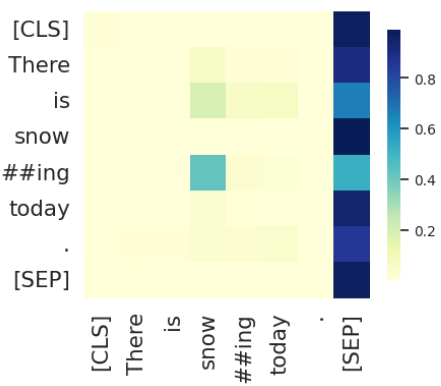

На ее основе матрицы внимания с помощью порогового значения ($τ$ от threshold) строится матрица смежности $A = (a_{ij})_{n×n}$, где

\begin{equation*}
a_{ij} =
 \begin{cases}
   1 &\text{if $w_{ij}>τ$}\\
   0 &\text{otherwise}
 \end{cases}
\end{equation*}

На основе матрицы смежности строится граф внимания. Он является ориентированным (рёбрам присвоено направление). Каждый токен соответствует вершине графа. Если $a_{ij}=1$, существует ребро из вершины $i$ в вершину $j$. Если $a_{ij}=0$, ребро отсутствует.

Рассмотрим получившиеся графы внимания при трех разных значениях $τ$.

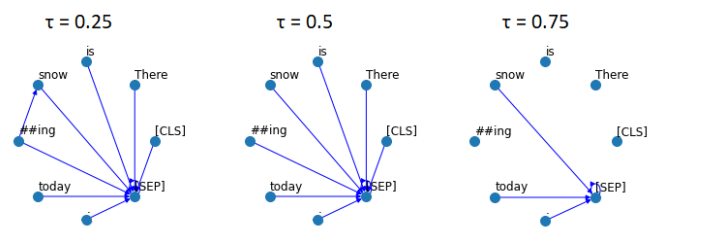

Определим свойства графов: количество ребер ($e$), количество компонент связности ($w$), количество циклов ($c$).

$τ=0.25:\;e=9\;\;\;w=1\;\;\;c=1$

📌 Найдите $e,w,c$ при других значениях $τ$

Графы внимания составляются отдельно для каждой головы внимания и конкатенируются. Это позволяет оценить роль весов внимания для каждой головы при решении задачи оценки приемлемости.

Полученные признаки графов внимания дообученных моделей используются для составления новых признаковых характеристик объектов. Вместо векторов из энкодерных моделей используются признаки, полученные с помощью топологического анализа графов внимания. Затем полученные векторы признаков поступают на вход алгоритма логистической регрессии, который предсказывает нужный класс: приемлемость или неприемлемотсть.

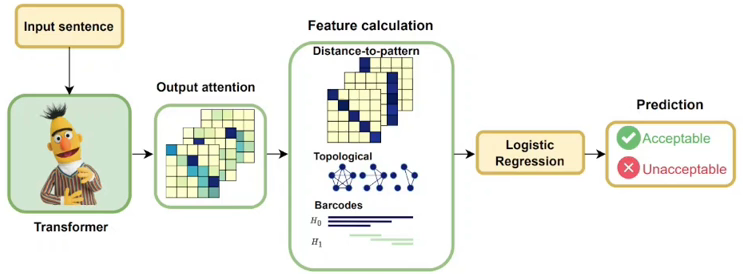

## Использование признаков TDA для классификации по приемлемости

Статьи содержат подробные гитхаб-репозитории с данными и кодом, который использовался для исследований.
- Acceptability Judgements via Examining the Topology of Attention Maps: https://github.com/danchern97/tda4la
- Can BERT eat RuCoLA*? Topological Data Analysis to Explain: https://github.com/upunaprosk/la-tda

### Загрузка и обработка данных

Будем использовать код второй статьи для загрузки и обработки данных. С помощью команды `git clone` создадим копию репозитория, который находится по ссылке.

In [ ]:
!git clone https://github.com/upunaprosk/la-tda.git

Можем убедиться, что в блокноте появилась папка `la-tda`, которая содержит все файлы из указанного репозитория.

С помощью команды `cd` (change directory) изменим рабочую директорию с корневой папки на папку `la-tda`. Для дальнейшей работы необходимо импортировать файл `read_features.py` из папки `src`. Он содержит функции для обработки файлов с данными (`read_labels`) и с признаками (`load_features`).

In [ ]:
%cd la-tda
from src.read_features import *

В папке `data` находится архив с данными `data.zip`. Его требуется разархивировать с помощью команды `unzip`.

In [ ]:
!unzip data/data.zip -d ./data

Данные разделены на три части: обучающую, валидационную и тестовую. Запишем их в соответствующие переменные.

In [ ]:
data_dir = "./data/en-cola/" # директория, где лежат данные на нужном языке
file_type = ".csv" # возможные варианты: .csv или .tsv
train_set_name, valid_set_name, test_set_name = ("train", "dev","test") # названия выборок данных
data_args = {'data_dir': data_dir, 'file_type': file_type} # словарь с директорией и типом файла
(sents_train, y_train), (sents_valid, y_valid), (sents_test, y_test) = list(map(lambda x: read_labels(x, **data_args),
                                                [x for x in (train_set_name, valid_set_name, test_set_name)]))
                                                # записываем предложения и метки классов в соответствующие файлы

В данном исследовании валидационная выборка CoLA (1043 предложения) разделена на две части, которые названы валидационной и тестовой.

📌 Определите количество предложений в валидационной и тестовой выборках.

In [ ]:
# Место для вашего кода

Признаки, извлеченные из предобученных моделей с помощью TDA, доступны на Hugging Face в [репозитории одного из авторов](https://huggingface.co/iproskurina) (модели с префиксом tda-). Они находятся в разделе `Files and versions`, в папке `features`. Для их скачивания нужно установить библиотеку `huggingface_hub`.

In [ ]:
!pip install huggingface_hub -q

Скачивание осуществляется с помощью метода `snapshot_download`. Нужно указать директорию, из которой осуществляется скачивание, и директорию, куда должны быть скачены файлы в блокноте.

In [ ]:
from huggingface_hub import snapshot_download
snapshot_download(repo_id="iproskurina/tda-bert-en-cola", local_dir='/content/tda-bert-en-cola')

Укажем директорию, куда сохранились признаки. Авторы проводили эксперименты с моделями на основе архитектур BERT и RoBERTa, поэтому количество голов внимания и слоев определяется в зависимости от архитектуры. Мы будем использовать анлоязычный BERT, что указано в переменной `model_dir`. Признаки находятся в папке `features`.

In [ ]:
model_dir = "/content/tda-bert-en-cola"
heads = 16 if "roberta" in model_dir.lower() else 12
layers = 24 if "roberta" in model_dir.lower() else 12
features_dir = model_dir + "/features/"

Для загрузки признаков используется функция `load_features`, которая была определена при скачивании файла `read_features.py` из гитхаб-репозитория.

In [ ]:
kwargs ={"features_dir": features_dir,
         "model_dir": model_dir,
         "heads": heads,
         "layers": layers}
X_train, X_valid, X_test = list(map(lambda x: load_features(x, **kwargs), [x for x in (train_set_name, valid_set_name, test_set_name)]))

Сейчас признаки представляют собой датафрейм, где каждая строка соответствует отдельному предложению.

📌 Выведите первые 5 строк обучающего датафрейма. Сколько признаков (столбцов) у каждого объекта?

In [ ]:
# Место для вашего кода

### Классификация по приемлемости

Собственно классификация включает в себя три этапа:
- стандартизация данных
- уменьшение размерности признаковых векторов
- обучение модели для классификации

Все эти этапы можно реализовать с помощью библиотеки sklearn.

Значения признаков могут сильно отличаться друг от друга. Следовательно, модели будет сложно в равной степени оценить их влияние. Это может стать причиной систематической ошибки. Стандартизация данных используется для изменения значений так, чтобы среднее значение было равно 0, а стандартное отклонение – 1. Для этого используется метод [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

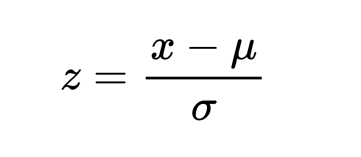

Векторы, содержащие признаковые характеристики объектов, могут обладать слишком большой размерностью. Нельзя случайно убрать часть признаков, ведь они могут содержать наиболее важную информацию об объекте. Для некоторых признаков наблюдается корелляция между значениями, однако эта связь может быть неочевидна и зависеть от других признаков.

Один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации, — метод главных компонент (principal component analysis, PCA). Зная зависимости и их силу, мы можем выразить несколько признаков через один. С математической точки зрения метод главных компонент представляет собой линейное преобразование, которое отображает данные из исходного пространство признаков в новое пространство меньшей размерности.

Для метода [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) необходимо указать параметр `n_components` — количество компонент (признаков), к которому необходимо прийти.

В качестве алгоритма для классификации используется [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Все этапы обработки объединяются в [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', PCA(random_state=42,
                       n_components=250)),
    ('clf', LogisticRegression(random_state=42,
                               solver='liblinear',
                               penalty='l1',
                               C=0.1))])

📌 Запустите обучение модели

In [ ]:
# Место для вашего кода

Создадим функцию для вывода метрик: accuracy и MCC.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

def print_scores(y, y_pred):
    acc, mcc = accuracy_score(y, y_pred), matthews_corrcoef(y, y_pred)
    print('Accuracy =', round(acc, 2))
    print('MCC =', round(mcc, 2))

Определим качество классификации для валидационной и тестовой выборки.

In [ ]:
print_scores(model.predict(X_valid), y_valid)

In [ ]:
print_scores(model.predict(X_test), y_test)

Можно заметить, что для валидационной выборки качество выше, чем для тестовой. Поскольку текущие валидационная и тестовая выборки получены из исходной валидационной, объединим их и также посчитаем метрики.

📌 Объедините признаки валидационной (`X_valid`) и тестовой (`X_test`) выборок с помощью метода [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html), а метки (`y_valid`, `y_test`) — с помощью метода [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html). Посчитайте значение метрик.

In [ ]:
X_val = # Место для вашего кода
X_val.shape

In [ ]:
y_val = # Место для вашего кода
y_val.shape

In [ ]:
# Место для вашего кода

## Значимость признаков и голов внимания для оценки приемлемости

Логистическая регрессия будучи линейным алгоритмом позволяет оценить значимость каждого признака для получения ответа. Чем больше вес признака, тем более значительный вклад он вносит в предсказание класса.

Признаковое описание данных было сформировано на основе графов внимания и содержит информацию о том, на основе матрицы какой головы внимания был получен каждый признак. Количество значимых признаков позволит определить значимость каждой головы внимания для оценки приемлемости предложения.

### Определение весов признаков

Ранее мы рассматривали случаи, когда веса признаков соответствовали коэффициентам регрессии.
- $m$ — исходная размерность признакого описания объекта
- $n$ — размерность вектора коэффициентов регрессии
- $m=n$

В данном случае для определения весов признаков необходимы дополнительные вычисления, поскольку алгоритм логистической регрессии получал векторы уменьшенной размерности после применения метода главных компонент.
- $m$ — исходная размерность признакового описания объекта
- $k$ — размерность признакого описания объекта после PCA
- $m > k$
- $n$ — размерность вектора коэффициентов регрессии
- $k=n$

Вес признака $f$ вычисляется с помощью перемножения вектора коэффициентов логистической регрессии $w$ и матрицы главных компонент $C$.

$$f = wC$$

Составные части модели (объекта класса Pipeline) доступны по ключу (`'scaler'`, `'reduce_dim'`, `'clf'`) в атрибуте `named_steps`. Коэффициенты алгоритма классификации хранятся в атрибуте `coef_`, главные компоненты метода уменьшения размерности — в атрибуте `components_`.

📌 Запишите в отдельные переменные:
- алгоритм классификации (`classifier`)
- вектор коэффициентов (`w`)
- алгоритм уменьшения размерности (`pca`)
- матрицу главных компонент (`C`)

In [ ]:
classifier = # Место для вашего кода
classifier

In [ ]:
w = # Место для вашего кода
w.shape

In [ ]:
pca = # Место для вашего кода
pca

In [ ]:
C = # Место для вашего кода
C.shape

📌 Посчитайте вес каждого признака `f` с помощью матричного умножения (`np.dot` или `@`).

In [ ]:
f = # Место для вашего кода
f.shape

Метод `.ravel()` позволяет получить одномерное представления массива любой формы.

In [ ]:
f = f.ravel()
f.shape

### Работа с объектами класса DataFrame

Перед тем как перейти к определению значимости голов внимания,
рассмотрим несколько важных методов для работы с датафреймами.

Создадим датайфрейм с тремя столбцами: название команды, количество баллов и сумма выигрыша. Названия команд будут повторяться.

In [ ]:
df = pd.DataFrame(
	[['Riders', 876, 10512],
	['Riders', 788, 9456],
  ['Kings', 701, 8412],
  ['Kings', 812, 9744],
  ['Kings', 756, 9072],
  ['Riders',694, 8328],
  ['Royals', 701, 8412],
  ['Royals', 804, 9648],
  ['Riders', 690, 8280]],
	columns=['team', 'points', 'amount'])
df

По умолчанию номера строк (индексы) являются целыми числами. Также можно использовать одну из колонок в качестве индекса (`.set_index()`).

In [ ]:
df = df.set_index('team')
df

Избавимся от повторения индексов, посчитав сумму очков и общий размер выигрыша для каждой команды. Нужно указать, что сумма (`.sum()`) будет подсчитываться для строк с одинаковыми индексами по всем столбцам (`.groupby(df.index)[df.columns]`)

In [ ]:
df.groupby(df.index)[df.columns].sum()

Можем создать копию датафрейма, где будут только объекты с конкретным значением для некоторого столбца.

In [ ]:
d = {'points': 701}
for k,v in d.items():
  df1 = df[df[k] == v]
df1

### Определение значимости голов внимания

Вероятность $i$-го предложения $p_i$ зависит от его признакового описания $X_i$ и веса каждого признака $f$:

$$p_i \sim \exp(X_if)$$

Чтобы рассмотреть значимость каждой головы внимания для различных грамматических явлений, будем работать с валидационной выборкой, которая содержит грамматическую разметку.

Вначале осуществим стандартизацию признаков валидационной выборки.

In [ ]:
scaler = model.named_steps['scaler']
scaler

In [ ]:
X_val_scaled = scaler.transform(X_val)
X_val_scaled.shape

Создадим матрицу из нулей, размер которой соответствует размеру валидационной выборки.

In [ ]:
V = np.zeros(X_val.shape)
V, V.shape

Умножаем значения признаков каждого объекта валидационной выборки на их вес и записываем в датафрейм.

In [ ]:
for i in range(X_val.shape[0]):
    V[i,:] = X_val_scaled[i,:] * f
V = pd.DataFrame(data=V, columns=X_train.columns)
V

Вес каждой головы внимания определяется весом признаков, которые были вычислены на основе ее графа внимания.

Название каждого признака содержит в конце два числа: к какому слою энкодера и к какой голове внимания он относится. При сложении весов признаков, которые относятся к $n$-й голове внимания $k$-го слоя, получим вес соответствующей головы внимания.

Транспонируем датафрейм: поменяем местами строки и столбцы. Изменим названия признаков, чтобы они совпадали для признаков одинаковых голов внимания.

In [ ]:
V = V.T
V.index = [f"head_{x.split('_')[-2]}_{x.split('_')[-1]}" for x in V.index]
V

📌 Посчитайте сумму по всем столбцам для строк с одинаковыми индексами.

In [ ]:
V = # Место для вашего кода
V

Снова поменяем местами строки и столбцы.

In [ ]:
V = V.T
V

Текущие веса показывают, насколько вероятно отнесения объекта к положительному классу. Чтобы учитывать вероятность отнесения к отрицательному классу, нужно умножить вес признака на -1 для предложений, которые классифицированы как неприемлемые.

Запишем предсказания модели на валидационной выборке.

In [ ]:
y_pred = model.predict_proba(X_val).argmax(axis=1)
y_pred.shape

Добавим предсказания в датафрейм.

In [ ]:
V.insert(len(V.columns), 'y_pred', y_pred)
V

Функция `invert_values` умножает значение вес признака на -1, если предсказан отрицательный класс.

In [ ]:
def invert_values(df):
    for i in np.where(df['y_pred'] == 0)[0]:
        for j in range(df.shape[1]-1):
            df.at[i, df.columns[j]] *= -1

In [ ]:
invert_values(V)
V

### Добавление грамматической разметки

Загружаем набор данных с разметкой по грамматическим признакам

In [ ]:
cola_major = pd.read_csv(data_dir + "phenomena.tsv", sep='\t')
cola_major

Запишем в отдельную переменную список размеченных грамматических явлений.

In [ ]:
cola_major.columns

In [ ]:
phenomena=list(cola_major.columns[4:])
phenomena

Конкатенируем датайфреймы с весами голов внимания и с граматической разметкой.

In [ ]:
V = pd.concat([V, cola_major], axis=1)
V

### Графическое отображение значимости голов внимания

Посчитать сумму весов каждой головы для всех предложений валидационной выборки можно с помощью метода `.sum()`.

In [ ]:
sum_df = V.sum()
sum_df

После этого можно создать матрицу весов $m×n$, где $m$ — количество слоев энкодера, $n$ — количество голов внимания на каждом слое. Для столбцов, название которых содержит слово "head", в соответствующую строку и столбец записываем среднее значение (сумму, поделенную на количество предложений).

In [ ]:
m = np.zeros((12, 12))
for name in sum_df.keys():
    if name.startswith('head_'):
        _, layer, head = name.split('_')
        layer = int(layer)
        head = int(head)
        m[layer, head] = sum_df[name] / df.shape[0]
m, m.shape

При составлении аналогичной матрицы не для всех предложений, а только для конкретного грамматического явления, необходимо предварительно отобрать строки, где значение данного признака равно 1.

In [ ]:
selectby={"Question": 1}
for k,v in selectby.items():
    Q = V[V[k] == v]
Q

Объединим все описанные шаги в функцию `collect_head_layer_matrix`.

In [ ]:
def collect_head_layer_matrix(df, selectby=None):
    if selectby is not None:
        for k,v in selectby.items():
            df = df[df[k] == v]
    sum_df = df.sum()
    m = np.zeros((12, 12))
    for name in sum_df.keys():
        if name.startswith('head_'):
            _, layer, head = name.split('_')
            layer = int(layer)
            head = int(head)
            m[layer, head] = sum_df[name] / df.shape[0]
    return pd.DataFrame(m)

Для красивого отображения графиков создадим словарь, где каждому грамматическому типу будет соответствовать номер строки и столбца, в котором он будет размещен.

In [ ]:
d = {"All": (0,0),
     phenomena[0]: (0,1),
     phenomena[1]: (0,2),
     phenomena[2]: (0,3),
     phenomena[3]: (1,0),
     phenomena[4]: (1,1),
     phenomena[5]: (1,2),
     phenomena[6]: (1,3),
     phenomena[7]: (2,0),
     phenomena[8]: (2,1),
     phenomena[9]: (2,2),
     phenomena[10]: (2,3),
     phenomena[11]: (3,0),
     phenomena[12]: (3,1),
     phenomena[13]: (3,2),
     phenomena[14]: (3,3)}
d

Отобразим на графике матрицы весов признаков для всех типов предложений.

In [ ]:
import matplotlib.pyplot as plt

# определяем количество строк, столбцов и размер графика
fig, axes = plt.subplots(nrows=4,ncols=4, figsize=(10, 10))

# создаем отдельный подграфик для каждого типа предложения
for k,v in d.items():
    # название -- ключ из словаря d
    title = k
    # график для всех предложений
    if k == 'All':
        m = collect_head_layer_matrix(V)
    # графики для конкретных типов
    else:
        m = collect_head_layer_matrix(V, selectby={k: 1})
    # номер строки и столбца -- ключ из словаря d
    ax = axes[v]
    # выводим название
    ax.set_title(title)
    # графически изображаем значения из матрицы
    im = ax.imshow(m)
    # для осей X и Y подписываем значения от 0 до 11
    ax.set_xticks([i for i in range(12)])
    ax.set_yticks([i for i in range(12)])

# ось Y обозначает номер слоя энкодера
fig.supylabel('Layer')
# отступы между подзаголовками и вокруг них
plt.tight_layout()
# выводим график
plt.show()

📌 Какие можно сделать выводы о значимости слоев энкодера и голов внимания для определения приемлемости предложений?